<h3>Quantization Noise </h3>
This experiment is some measurements of the quantization noise generated from the ADC in a highly attenuated measurement. First the raw codes are read and 
plotted.

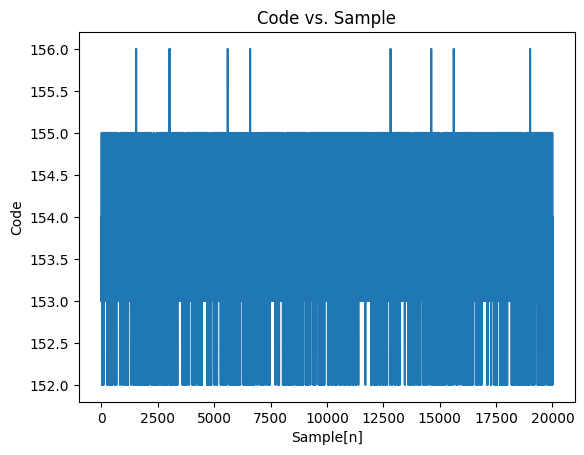

In [3]:
import matplotlib.pyplot as plt
codes = [int(code) for code in open('signal.txt').read().split(',')]
codes = codes[8:len(codes)]
nn = [i for i in range(0, len(codes))]
plt.plot(nn, codes)
plt.title('Code vs. Sample')
plt.ylabel('Code')
plt.xlabel('Sample[n]')
plt.show()


As can be observed, there isn't actually that much noise in the codes, about 4 steps. However, after amplifiying the signal, this noise is also amplfied. 

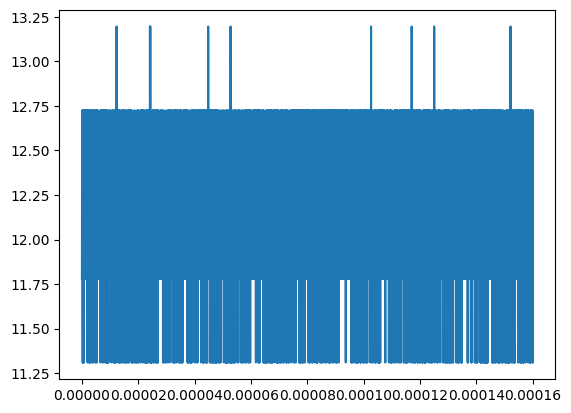

In [4]:
import numpy as np
def inverse_quantize(code:int, resolution:float, voltage_ref:float) -> float:
    return float((voltage_ref/resolution)*code)
    
def reamplify(x:float, attenuator_range:float) -> float: 
    return x*(1/attenuator_range)

vv = [reamplify(inverse_quantize(code, 256, 1) - 0.5, 0.008289) for code in codes]
Fs = 125000000
Ts = 1/Fs
tt = np.array([n*Ts for n in nn])

plt.plot(tt, vv)
plt.show()

Obviously, this is far too much spread. However, low pass filtering is an option, so it would be nice to know the frequency of the digitizing noise. 

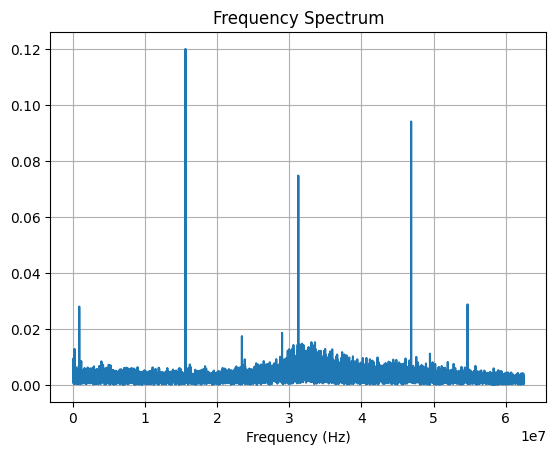

In [5]:
from scipy.fft import fft, fftfreq
import numpy as np

N = len(nn)
vf = fft(vv)
tf = fftfreq(N, Ts)[:N//2]
vf = 2.0/N * np.abs(vf[0:N//2])
vf = vf[8:len(vf)]
tf = tf[8:len(tf)]
plt.plot(tf, vf)
plt.grid()
plt.title("Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.show()

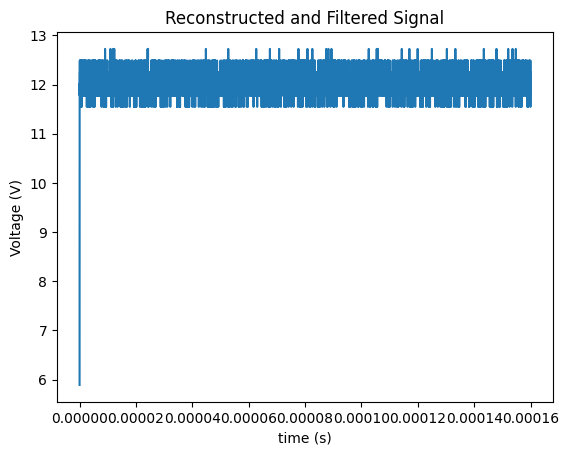

In [6]:
from scipy import signal
N = 2
Ps = 40
hh = np.array([1/N for _ in range(0, N)])
filtered_vv = np.convolve(vv, hh)
plt.plot(tt, filtered_vv[0:len(tt)])
plt.title("Reconstructed and Filtered Signal")
plt.xlabel("time (s)")
plt.ylabel("Voltage (V)")
plt.show()

We can see that a 150 point running average filter produces a fairly thin response, but how does this affect the frequency response?

[       0.           122070.3125       244140.625        366210.9375
   488281.25         610351.5625       732421.875        854492.1875
   976562.5         1098632.8125      1220703.125       1342773.4375
  1464843.75        1586914.0625      1708984.375       1831054.6875
  1953125.          2075195.3125      2197265.625       2319335.9375
  2441406.25        2563476.5625      2685546.875       2807617.1875
  2929687.5         3051757.8125      3173828.125       3295898.4375
  3417968.75        3540039.0625      3662109.375       3784179.6875
  3906250.          4028320.3125      4150390.625       4272460.9375
  4394531.25        4516601.5625      4638671.875       4760742.1875
  4882812.5         5004882.8125      5126953.125       5249023.4375
  5371093.75        5493164.0625      5615234.375       5737304.6875
  5859375.          5981445.3125      6103515.625       6225585.9375
  6347656.25        6469726.5625      6591796.875       6713867.1875
  6835937.5         6958007.8125  

/home/schuyler/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/schuyler/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


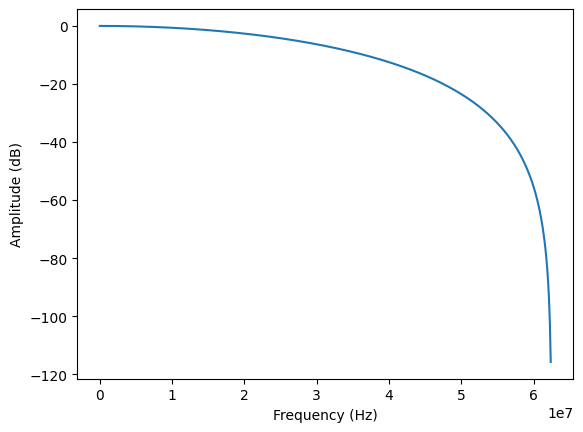

In [7]:
Fs = 125e6
w, HH = signal.freqz(hh)
ff = (w*Fs)/(2*np.pi)
print(ff)
HH = 20*np.log(HH)
plt.plot(ff, HH)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.show()